# Practice 4.9
### contents

### 1. import libraries
### 2. import data 
### 3. visualizations, celaning, EDA
* bar chart
* histogram
* scatterplot
* exporting chart as portable network graphic

### 4. sampling data, 
* random, seed, len functions
* line charts

### 5. Crosstabs 


## 1. import libraries

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 2. import data

In [2]:
#set path
path = r"C:\Users\andre\OneDrive\Documents\coursework 2022\CF\Immersion\Achievement 4\Instacart Basket Analysis"

In [4]:
%%time 
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.8.pkl'))

CPU times: total: 18 s
Wall time: 19.8 s


## 3. plotting charts and visualizations for cleaning and EDA
### * bar charts, additional functions tailoring the visualizations in matplotlib

CPU times: total: 203 ms
Wall time: 371 ms


<Axes: >

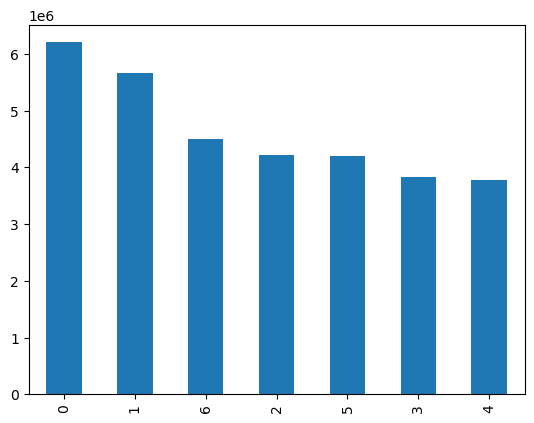

In [5]:
%%time
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: >

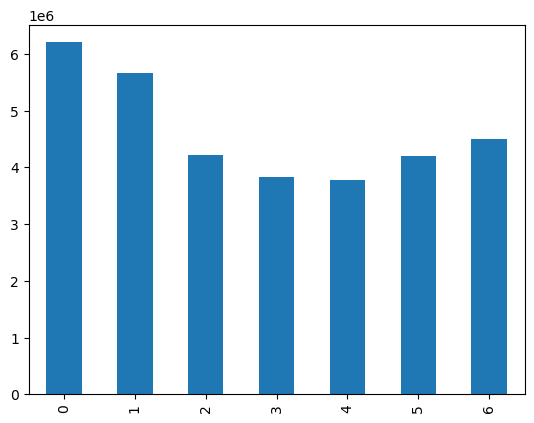

In [6]:
#using the sort_index() function
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [7]:
#sort_index applied to frequency function
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: orders_day_of_week, dtype: int64

<Axes: >

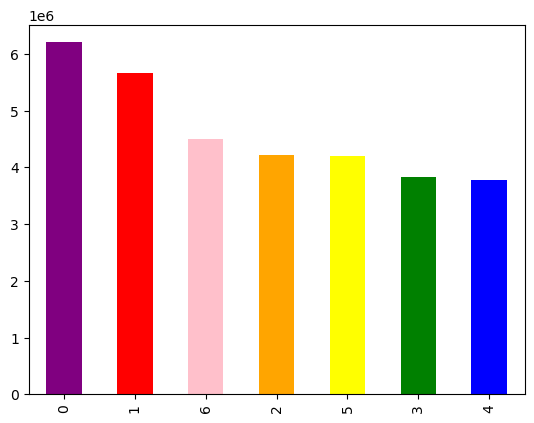

In [8]:
#adding color 
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

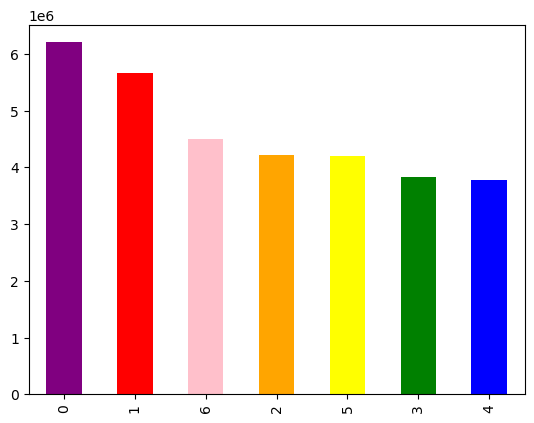

In [9]:
#exporting charts step 1
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [12]:
#exporting charts as portable network graphic step 2
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### * histogram, descriptive stats 

CPU times: total: 1.08 s
Wall time: 1.19 s


<Axes: ylabel='Frequency'>

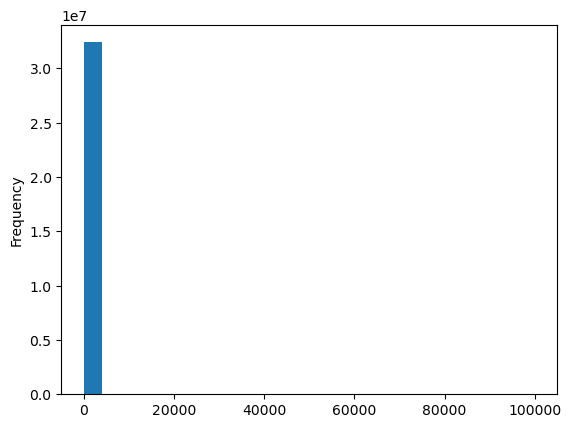

In [13]:
%%time
ords_prods_merge['prices'].plot.hist(bins = 25)

### visual check displays unexpected results
* use descriptive statistics function describe() to view max is outlier


### * scatterplot, outliers


In [ ]:
%%time
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [15]:
#check outliers
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_dspo,frequency_flag
10030345,912404,17,prior,12,2,14,5.0,21553,5,0,...,High-range,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,prior,22,6,16,4.0,21553,3,1,...,High-range,Regularly busy,Regularly busy,Average orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,prior,2,2,21,13.0,21553,6,0,...,High-range,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,prior,3,0,8,12.0,21553,3,1,...,High-range,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,prior,8,1,19,30.0,21553,9,0,...,High-range,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,prior,29,0,8,4.0,33664,1,0,...,High-range,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,prior,31,0,9,2.0,33664,1,1,...,High-range,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,prior,13,3,15,8.0,33664,25,0,...,High-range,Regularly busy,Least busy days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,2486215,205227,prior,7,3,20,4.0,33664,8,0,...,High-range,Regularly busy,Least busy days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [16]:
#set outliers as missing values
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [17]:
#check
ords_prods_merge['prices'].max()

25.0

### rerun histogram after cleaning

CPU times: total: 1.05 s
Wall time: 1.17 s


<Axes: ylabel='Frequency'>

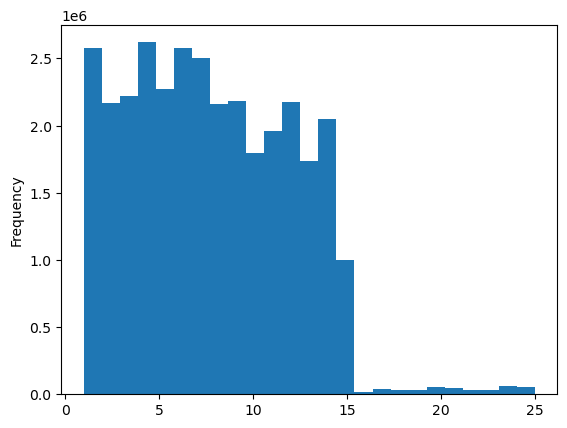

In [18]:
%%time
ords_prods_merge['prices'].plot.hist(bins = 25)

<Axes: ylabel='Frequency'>

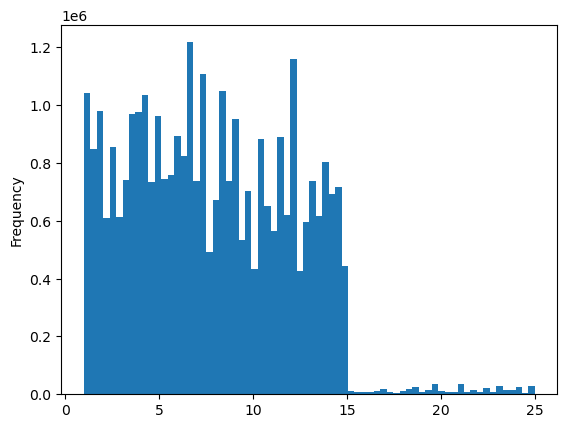

In [19]:
#creating more bins to dice and slice
ords_prods_merge['prices'].plot.hist(bins = 70)

## 4. sampling data with seed(), line charts

* Set the seed for the random number generator.
* Create 32,404,859 random numbers (the length of your ords_prods_merge dataframe) ranging between 0 and 1.
* Code a logical test comparing each of those numbers to a value of 0.7 (either less than or greater than 0.7).
* Store the results of the test in a new list, dev, in the form of boolean values (True and False).

In [20]:
#set seed for random number generator 
np.random.seed(4)

In [21]:
#create boolean list 
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [22]:
#check, print dev
dev

array([False,  True, False, ...,  True,  True,  True])

In [23]:
#store 70% of sample 
big = ords_prods_merge[dev]

In [24]:
#store 30% of sample using tilde as False
small = ords_prods_merge[~dev]

In [25]:
#check 
len(ords_prods_merge)

32404859

In [26]:
len(big) + len(small)

32404859

In [27]:
#create dataframe
df_2 = small[['orders_day_of_week','prices']]

#### line chart of new dataframe

CPU times: total: 2min 32s
Wall time: 2min 40s


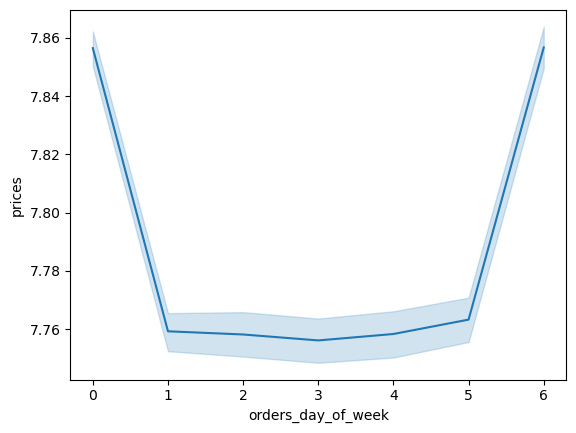

In [30]:
%%time
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

## crosstabs for excel using to_clipboard()

In [ ]:
#jupyter trickt for checking values in column via excel
#create table using crosstab that includes column in question and the key column, set as a variable
crosstab = pd.crosstab(df['days_since_prior_order'], df['order_number'], dropna = False)

In [ ]:
#copy table to clipboard. then paste into excel
crosstab.to_clipboard()

In [ ]:
crosstab2 = df.columns['orders_day_of_week']